In [220]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
import timeit

### Problem 1. Basis Vectors in 2D Coordinate Space

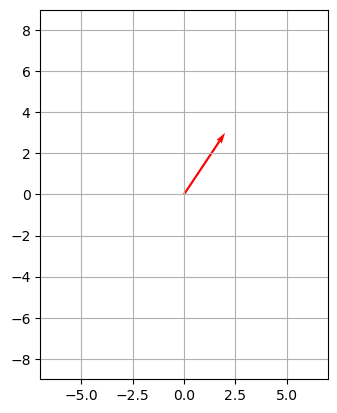

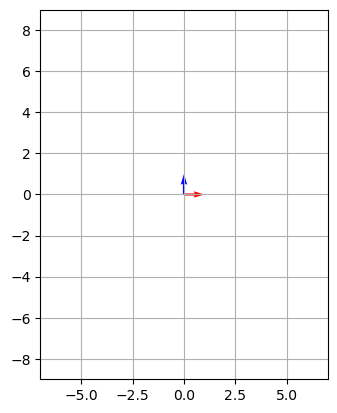

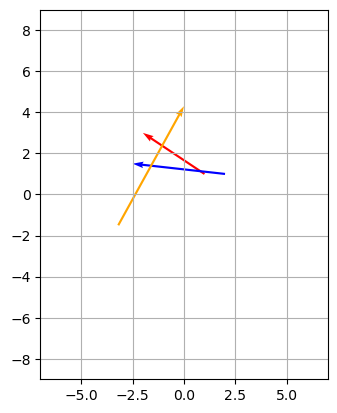

In [221]:
#plot vectors
def plot_vectors(vectors, colors):
  # start_x = [v[0] for v in vectors] we can use numpy for the same result
  # start_y = [v[1] for v in vectors]
  
  vectors_array = np.array(vectors)
  
  start_x = vectors_array[:, 0]
  start_y = vectors_array[:, 1]
  end_x = vectors_array[:, 2]
  end_y = vectors_array[:, 3]
  
  # plt.quiver does not take end_x and end_y, but start_x, start_y and length(length is end_x, end_y - start_x, start-y)
  length_x = end_x - start_x
  length_y = end_y - start_y
  plt.quiver(start_x, start_y, length_x, length_y, color = colors, scale_units = "xy", angles = "xy", scale = 1)
  plt.xlim(-7, 7)
  plt.ylim(-9, 9) 
  
  plt.grid()
  plt.gca().set_aspect("equal")
  
  #crossing points for the last plotting vectors
  # plt.axvline(1, linestyle = "dotted", color = "black")
  # plt.axhline(1, linestyle = "dotted", color = "black")
  
  # plt.axvline(-2, linestyle = "dotted", color = "magenta")
  # plt.axhline(3, linestyle = "dotted", color = "magenta")
  
  plt.show()
  
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

In [222]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """
    T_matrix = np.array([e1, e2]).T
    coef = np.linalg.solve(T_matrix, v)
    return coef

Coefficients:  [3.5 8.6]


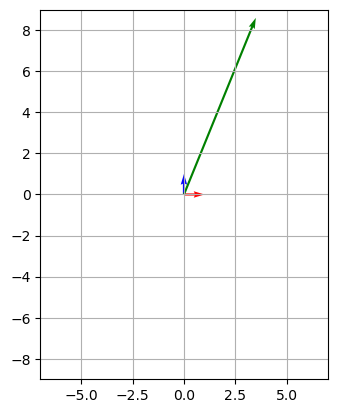

In [223]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
# f = [e1, e2, v]
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])


Coefficients:  [2.73529412 0.39411765]


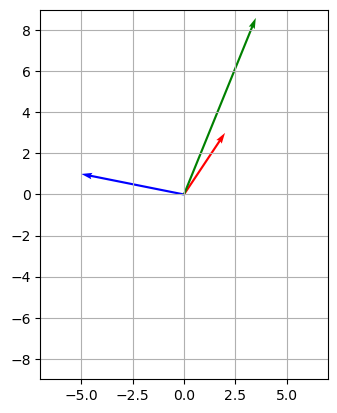

In [224]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Coefficients:  [1.796 0.472]


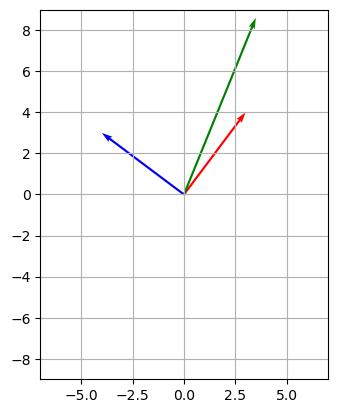

In [225]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Coefficients:  [1.72  0.875]


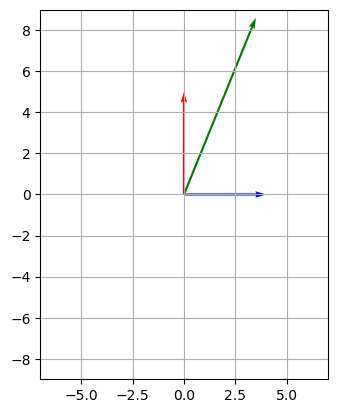

In [226]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

### 1.1 Additional Info to Problem 1.

In [227]:
# calculating vectors length
vector_e1 = [3, 4]
vector_length = np.sqrt(vector_e1[0] ** 2 + vector_e1[1] ** 2)
print(f"1.Vector length: {vector_length}")

# calculating vectors length with norm
vector_len_norm = np.linalg.norm(vector_e1, 2) # 2 is the norm (2, 1, infinity, 0)
vector_max_len = np.linalg.norm(vector_e1, np.inf)
print(f"2.Vector lenght with norm: {vector_len_norm}")
print(f"3.Vector max lenght with norm: {vector_max_len}")

1.Vector length: 5.0
2.Vector lenght with norm: 5.0
3.Vector max lenght with norm: 4.0


In [228]:
x = np.random.randint(1, 100, size = 50000)
x_list = x.tolist()

In [229]:
%%timeit
# speed test normal loop summ
python_sum = 0
for i in range(len(x_list)):
    python_sum += x_list[i]

2.13 ms ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [230]:
%%timeit 
# we can import timeit
# speed test with numpy summ
numpy_sum = np.sum(x)

9.57 µs ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [231]:
# timeit with String measuring the time of execution
timeit.timeit("import numpy as np; np.sum([1, 2, 3])")

4.02921570000035

In [232]:
# without String, measuring the time of execution
timeit.timeit(lambda: np.sum([1, 2, 3]))

3.9421257999965746

In [233]:
# We can pass function directly
def np_sum(x):
  return np.sum(x)

timeit.timeit(lambda: np_sum(x_list), number=1000) # number=1000 is execution number

1.518802599999617

### Problem 2. Images as Matrices. Image arithmetic

In [234]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

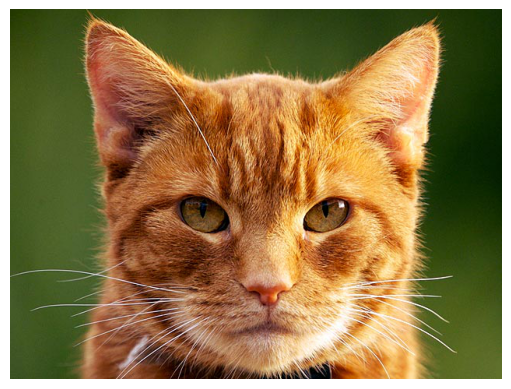

Cat shape: (475, 632, 3)
First pixel: [35 55  4]


In [235]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

plt.imshow(cat_image)
plt.axis("off")
plt.show()

# 475 its hight downward by rows/ 632 is width to right by columns/ 3 is RGB (colors - red, green, blue)
print(f"Cat shape: {cat_image.shape}")
print(f"First pixel: {cat_image[0][0]}") # First pixel

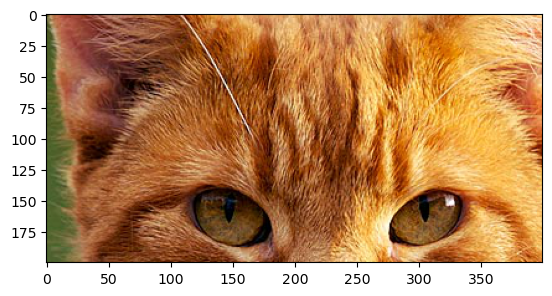

In [236]:
# cut the image by pixel
plt.imshow(cat_image[100:300, 100:500, :])

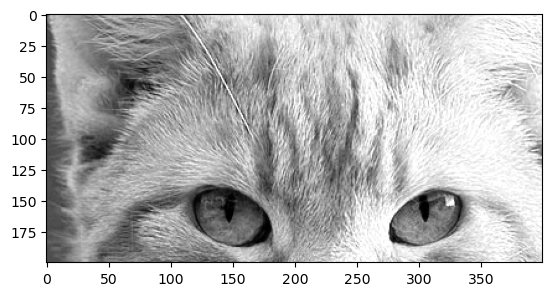

In [237]:
# red canal
plt.imshow(cat_image[100:300, 100:500, 0], cmap="grey")

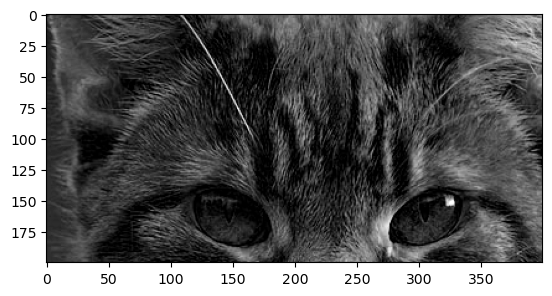

In [238]:
# blue canal
plt.imshow(cat_image[100:300, 100:500, 2], cmap="grey")

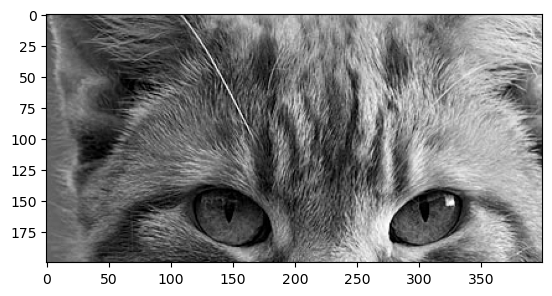

In [239]:
# green canal
plt.imshow(cat_image[100:300, 100:500, 1], cmap="grey")

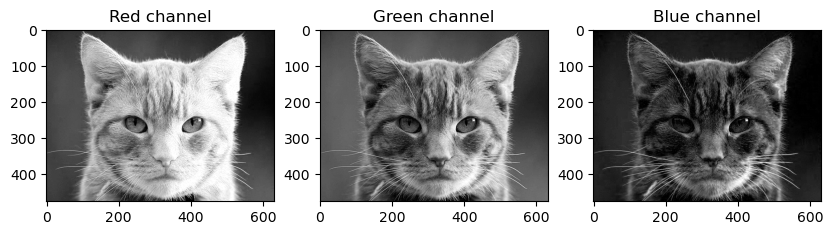

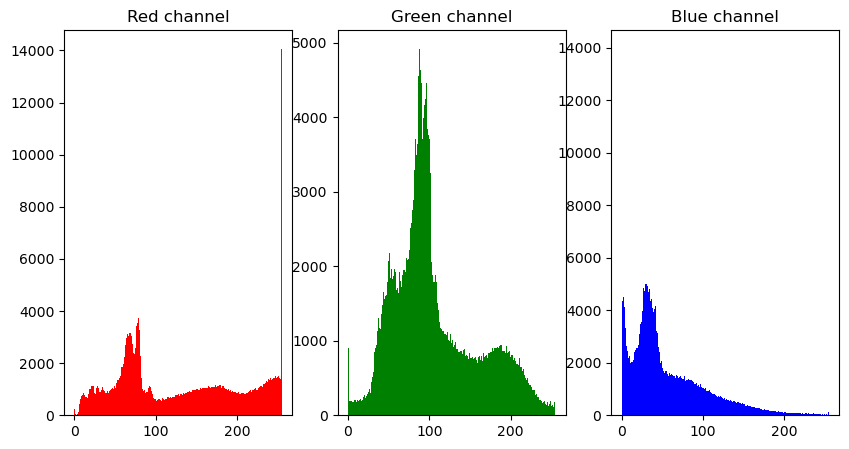

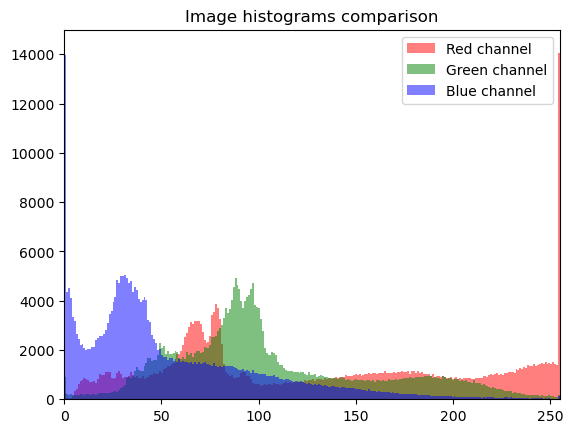

In [246]:
# RGB channels comparison one by one
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]

f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 5))
fig, (ax_red, ax_green, ax_blue) = plt.subplots(1, 3, figsize= (10, 5))

# plot cat image on red, green, blue channel
ax_r.imshow(cat_image_r, cmap = "gray")
ax_r.set_title("Red channel")
ax_g.imshow(cat_image_g, cmap = "gray")
ax_g.set_title("Green channel")
ax_b.imshow(cat_image_b, cmap = "gray")
ax_b.set_title("Blue channel")
# plt.setp([ax_r, ax_g, ax_b], xticks = [], yticks = []) # Remove axis ticks

# plot histogram for every channel changing
ax_red.hist(cat_image_r.ravel(), bins = 256, color = "red")
ax_red.set_title("Red channel")
ax_green.hist(cat_image_g.ravel(), bins = 256, color = "green")
ax_green.set_title("Green channel")
ax_blue.hist(cat_image_b.ravel(), bins = 256, color = "blue")
ax_blue.set_title("Blue channel")
plt.show()

# plot histogram comparison between red, green, blue
plt.hist(cat_image_r.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Red channel")
plt.hist(cat_image_g.ravel(), bins = 256, color = "green", alpha = 0.5, label = "Green channel")
plt.hist(cat_image_b.ravel(), bins = 256, color = "blue", alpha = 0.5, label = "Blue channel")
plt.ylim(0, 15000)
plt.xlim(0, 255)
plt.title("Image histograms comparison")
plt.legend()
plt.show()

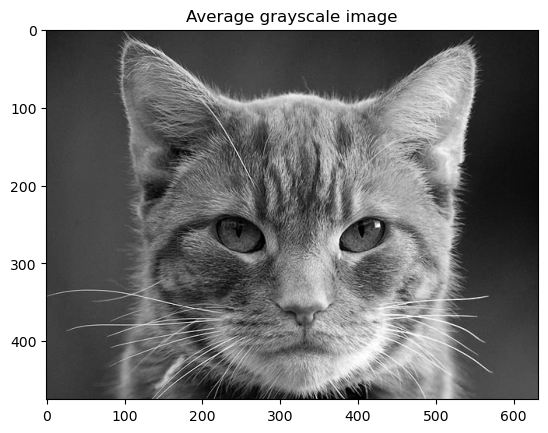

In [241]:
# If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized = [
    channel / 255 for channel in [cat_image_r, cat_image_g, cat_image_b]
] 
cat_image_gray = (cat_image_r_normalized + cat_image_g_normalized + cat_image_b_normalized) / 3.0  
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

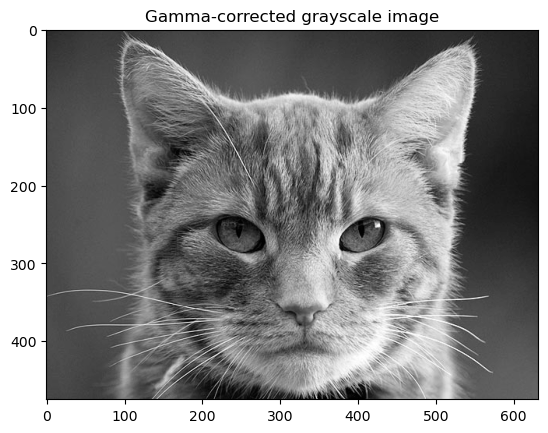

In [242]:
# The eye is more sensitive to greens than reds or blues. This is called luminance correction (or gamma correction).
cat_image_gray_corrected = (0.299 * cat_image_r_normalized + 
                            0.587 * cat_image_g_normalized + 
                            0.114 * cat_image_b_normalized)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

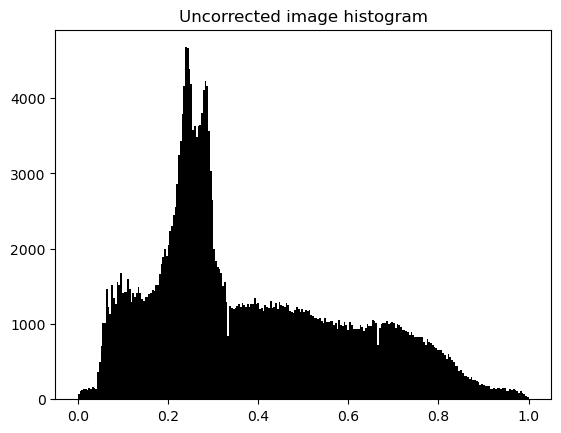

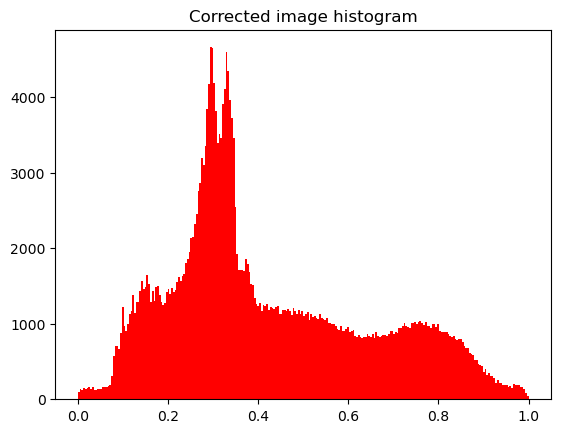

In [243]:
# histogram showing the change in uncorrected and corrected image
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

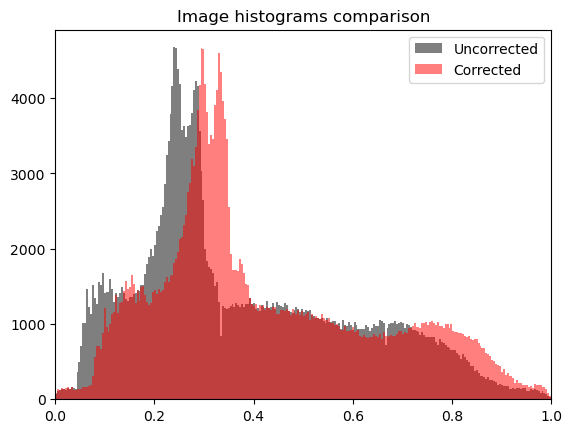

In [244]:
# Represent the image as a single-dimensional vector
hist_vector = cat_image_gray.ravel()

# Normalize the image to have values in the range [0; 1]
hist_vector = hist_vector / (hist_vector.max() - hist_vector.min())

plt.hist(hist_vector, bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.xlim(0, 1)
plt.title("Image histograms comparison")
plt.legend()
plt.show()